Modifying Legend Plots
==========

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

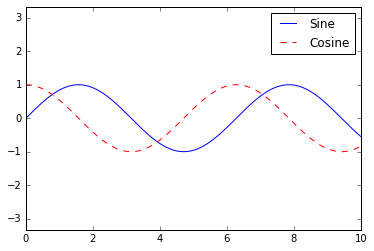

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

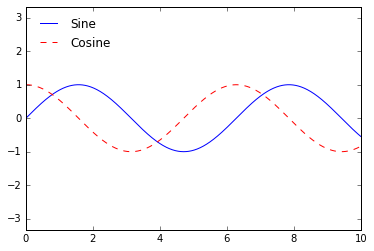

In [4]:
ax.legend(loc = 'upper left', frameon = False)
fig

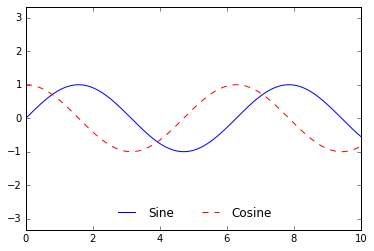

In [5]:
ax.legend(frameon = False, loc = 'lower center', ncol = 2)
fig

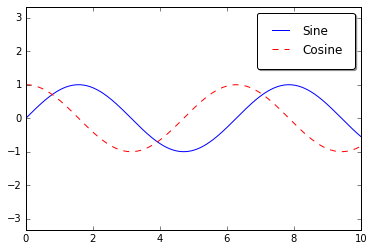

In [6]:
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1)
fig

Selecting Components for Legend
----

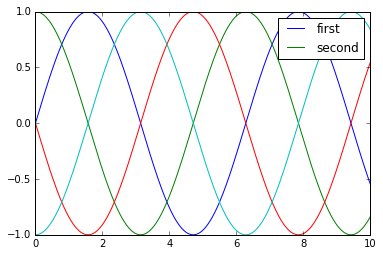

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

another way to modify legend components

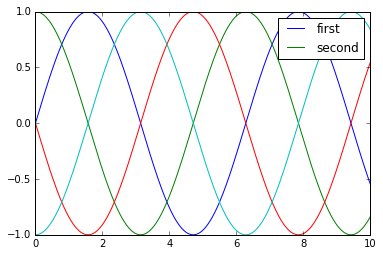

In [8]:
plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha = 1, frameon = True)

Size of dots for Legend
----

Multi Legends
---

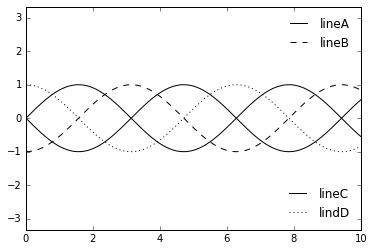

In [10]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color = 'black')
ax.axis('equal')

ax.legend(lines[:2], ['lineA', 'lineB'],
         loc = 'upper right', frameon = False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['lineC', 'lindD'], loc = 'lower right', frameon = False)
ax.add_artist(leg)

Modifying Color Bar
--------

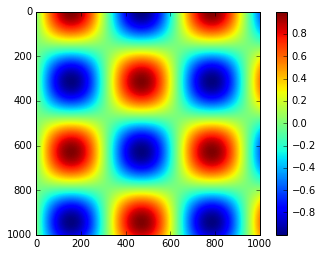

In [11]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

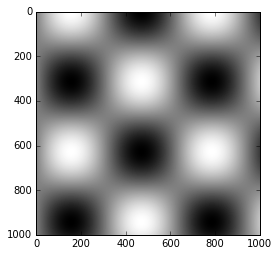

In [12]:
plt.imshow(I, cmap = 'gray')

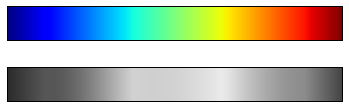

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig,ax = plt.subplots(2, figsize = (6, 2),
                         subplot_kw = dict(xticks = [], yticks = []))
    ax[0].imshow([colors], extent = [0, 10, 0, 1])
    ax[1].imshow([grayscale], extent = [0, 10, 0, 1])
    
view_colormap('jet')

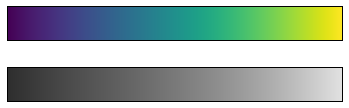

In [15]:
view_colormap('viridis')

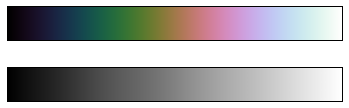

In [16]:
view_colormap('cubehelix')

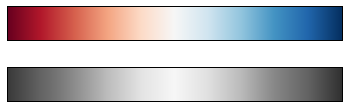

In [17]:
view_colormap('RdBu')

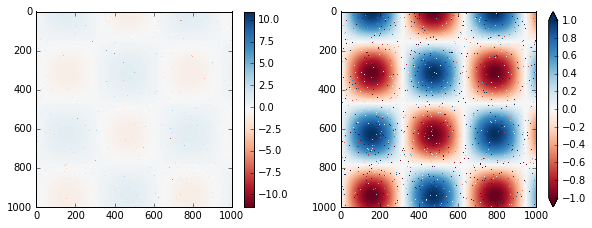

In [18]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize = (10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar(extend = 'both')
plt.clim(-1, 1)

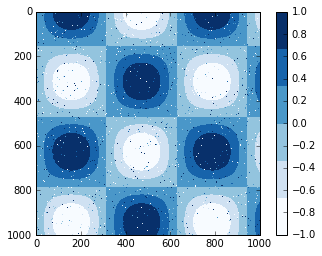

In [19]:
plt.imshow(I, cmap = plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

Example : Hand Written Numbers
    -------

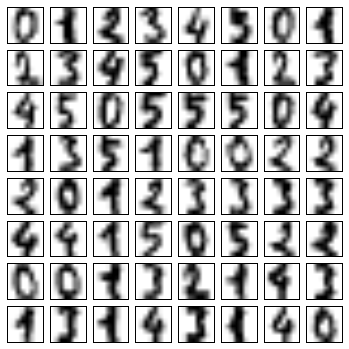

In [21]:
from sklearn.datasets import load_digits

digits = load_digits(n_class = 6)
fig, ax = plt.subplots(8, 8, figsize = (6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap = 'binary')
    axi.set(xticks = [], yticks = [])

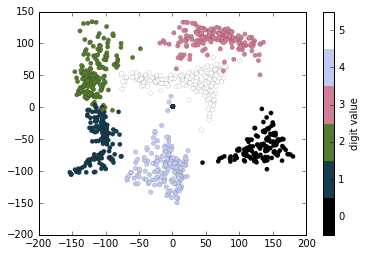

In [22]:
from sklearn.manifold import Isomap

iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw = 0.1,
           c = digits.target, cmap = plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks = range(6), label = 'digit value')
plt.clim(-0.5, 5.5)